In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.legend_handler import HandlerTuple
import seaborn as sns
import math
import os

In [3]:
#from colors import *
sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(25, 7), "xtick.bottom": True, "grid.linestyle": ":"})

In [4]:
PATH = "../data/finals_all_0106"

files = os.listdir(PATH)
files = [x for x in files if 'csv' in x]

In [5]:
file_data = []
diff_means = []
for file in files:
    data_in = pd.read_csv(f"{PATH}/{file}")
    try:
        mean = data_in.query("fw != -1 & diff > 0")['diff'].mean()
        if not math.isnan(mean):
            diff_means.append(mean)
    except:
        print(data_in, file)
    file_data.append(data_in)
    
data = pd.concat(file_data)

In [26]:
data

,Unnamed: 0,id,threshold,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete_upper,ete_lower,fw,diff
0,0,0,2313,Blend2D,default,Blend2D_default,fullscreen,2.0,bitblt,11291,13603,4887,6404
1,1,1,2313,Blend2D,default,Blend2D_default,fullscreen,2.0,bitblt,12327,14641,6417,5910
2,2,2,2313,Blend2D,default,Blend2D_default,fullscreen,2.0,bitblt,11633,13950,5467,6166
3,3,3,2313,Blend2D,default,Blend2D_default,fullscreen,2.0,bitblt,12471,14785,6739,5732
4,4,4,2313,Blend2D,default,Blend2D_default,fullscreen,2.0,bitblt,11277,13592,5210,6067
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,3874,wxpython,rects,wxpython_rects,fullscreen,2.0,windup,43989,338,40566,3423
196,196,196,3874,wxpython,rects,wxpython_rects,fullscreen,2.0,windup,41916,509,38535,3381
197,197,197,3874,wxpython,rects,wxpython_rects,fullscreen,2.0,windup,43320,346,39826,3494
198,198,198,3874,wxpython,rects,wxpython_rects,fullscreen,2.0,windup,44345,689,40669,3676


In [6]:
data_default = data[data['complexity'] == 'default']
data_default_fs = data_default[data_default['fullscreen'] == 'fullscreen']
data_default_nfs = data_default[data_default['fullscreen'] == 'no_fullscreen']
data_default_large = data_default[data_default['fullscreen'] == 'large']
data_default_small = data_default[data_default['fullscreen'] == 'small']

(0.0, 25000.0)

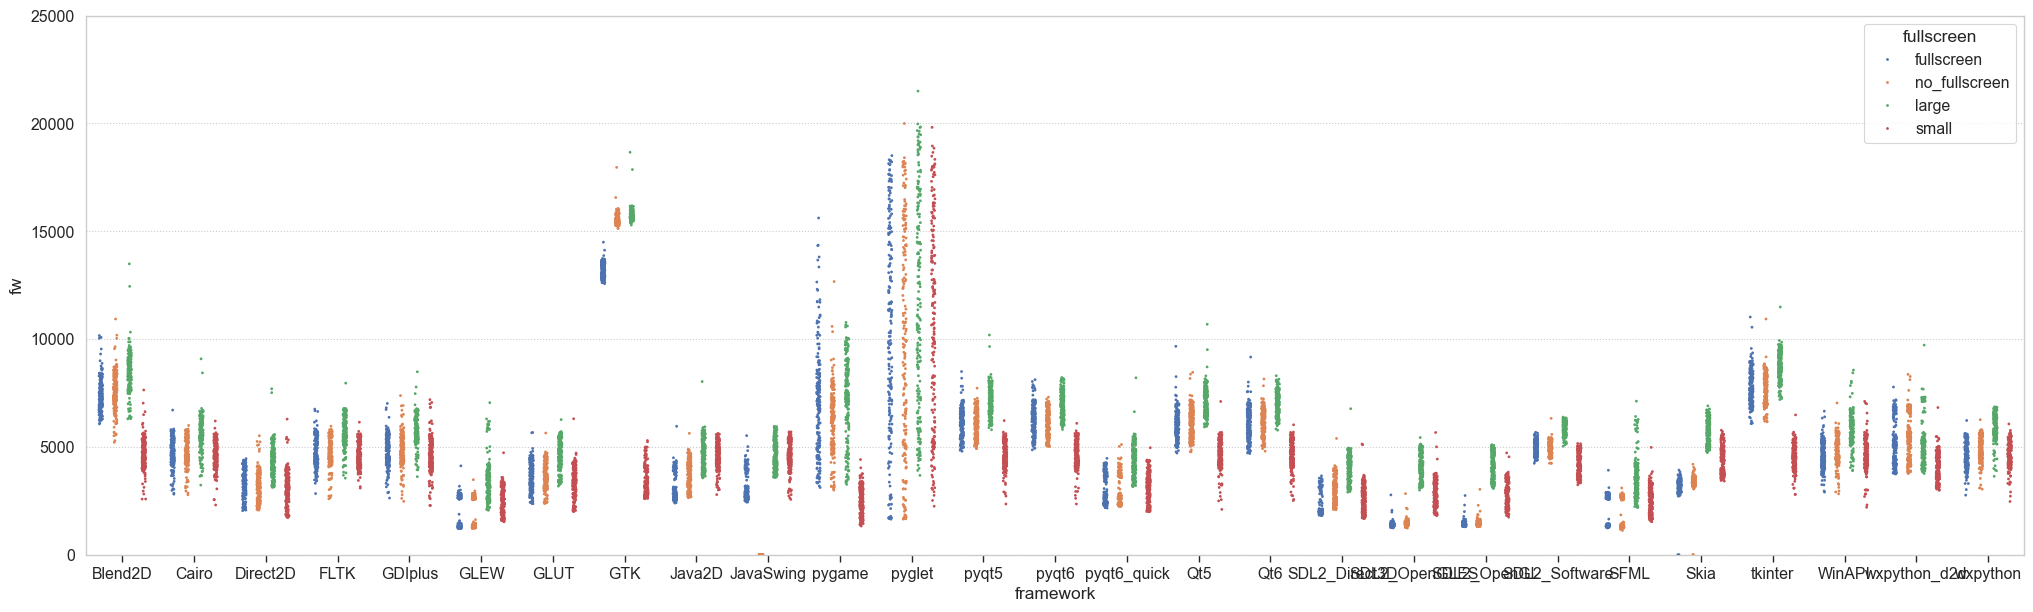

In [28]:
plot = sns.stripplot(data=data_default[data_default['program'] == 'windup'], x='framework', y='fw', hue='fullscreen', hue_order=['fullscreen', 'no_fullscreen', 'large', 'small'], dodge=True, size=2)
plot.axes.set_ylim(0, 25000)

(0.0, 40000.0)

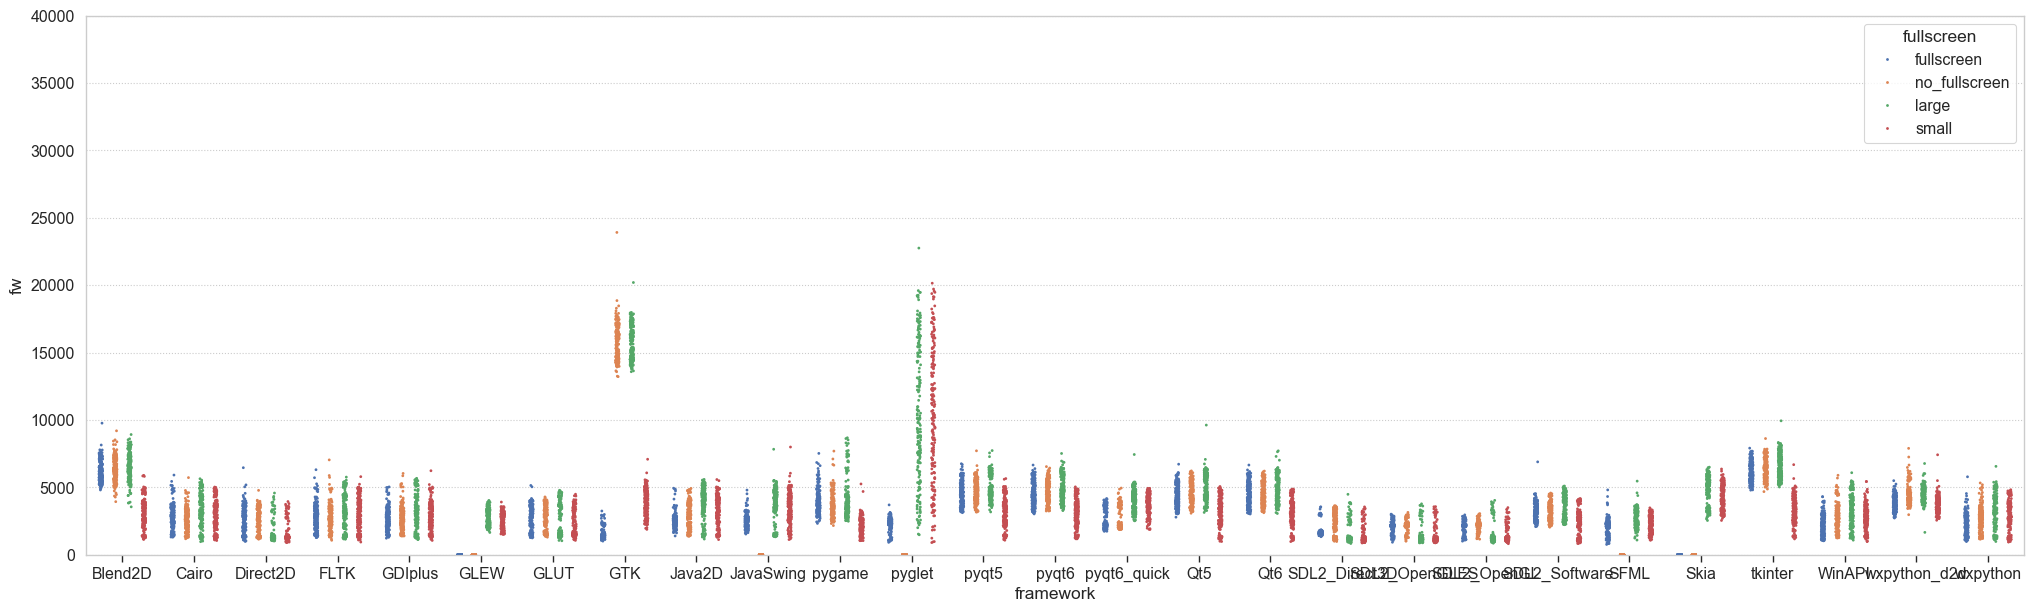

In [29]:
plot = sns.stripplot(data=data_default[data_default['program'] == 'getpixel'], x='framework', y='fw', hue='fullscreen', hue_order=['fullscreen', 'no_fullscreen', 'large', 'small'], dodge=True, size=2)
plot.axes.set_ylim(0, 40000)

(0.0, 40000.0)

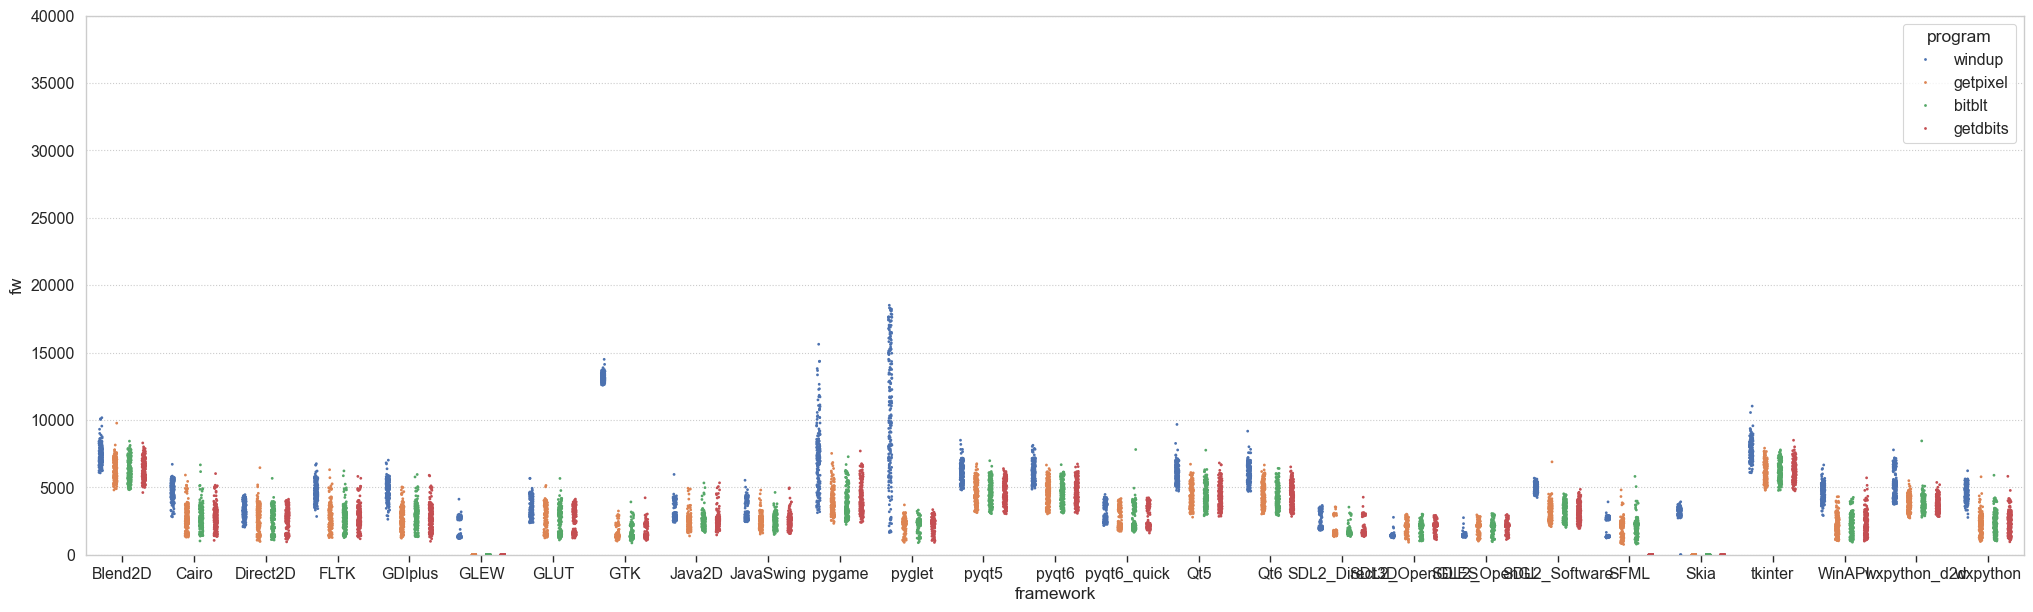

In [30]:
plot = sns.stripplot(data=data_default_fs, x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, size=2)
plot.axes.set_ylim(0, 40000)

(0.0, 40000.0)

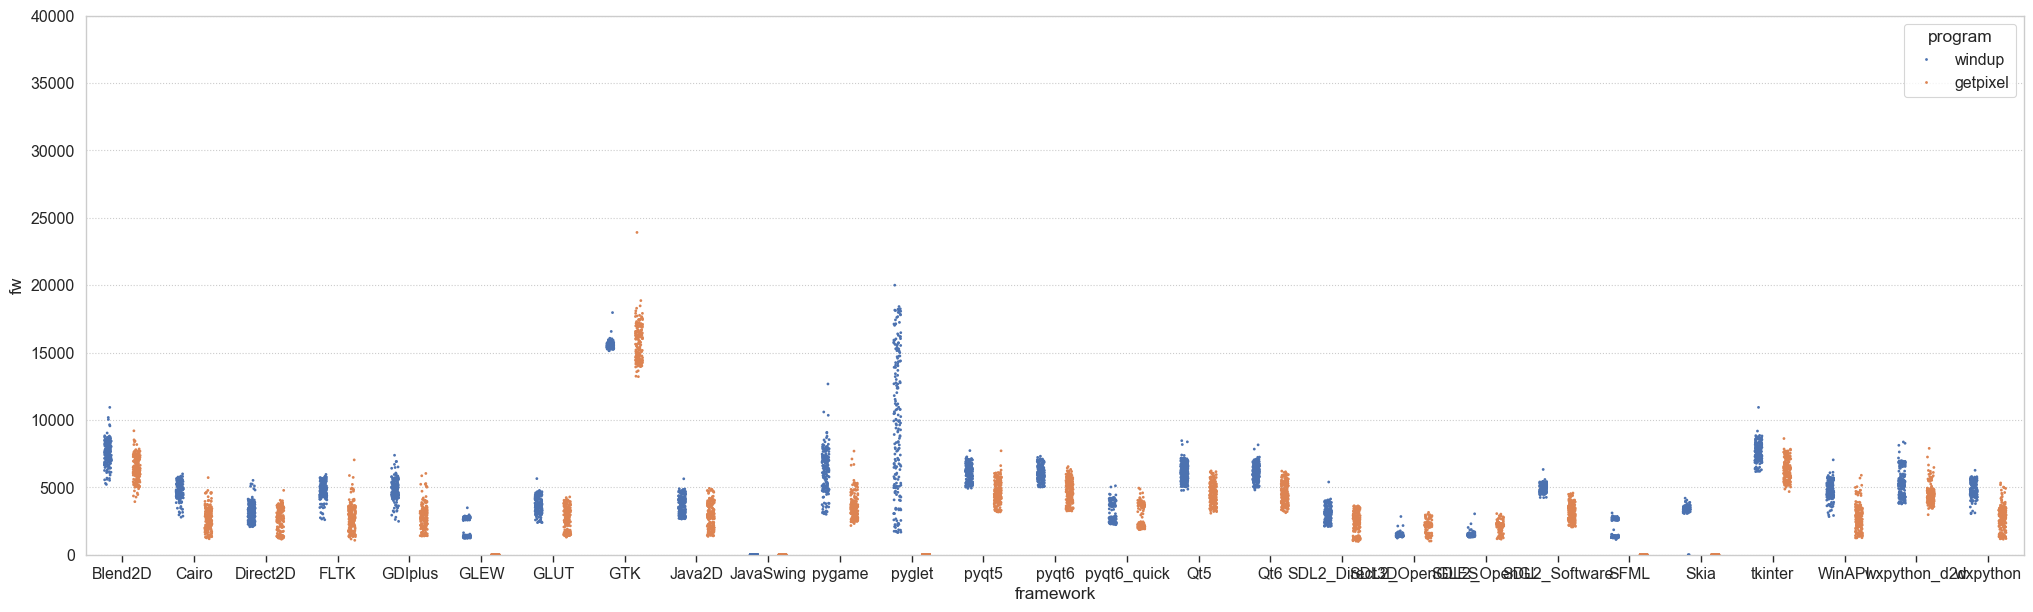

In [31]:
plot = sns.stripplot(data=data_default_nfs, x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel'], dodge=True, size=2)
plot.axes.set_ylim(0, 40000)

(0.0, 40000.0)

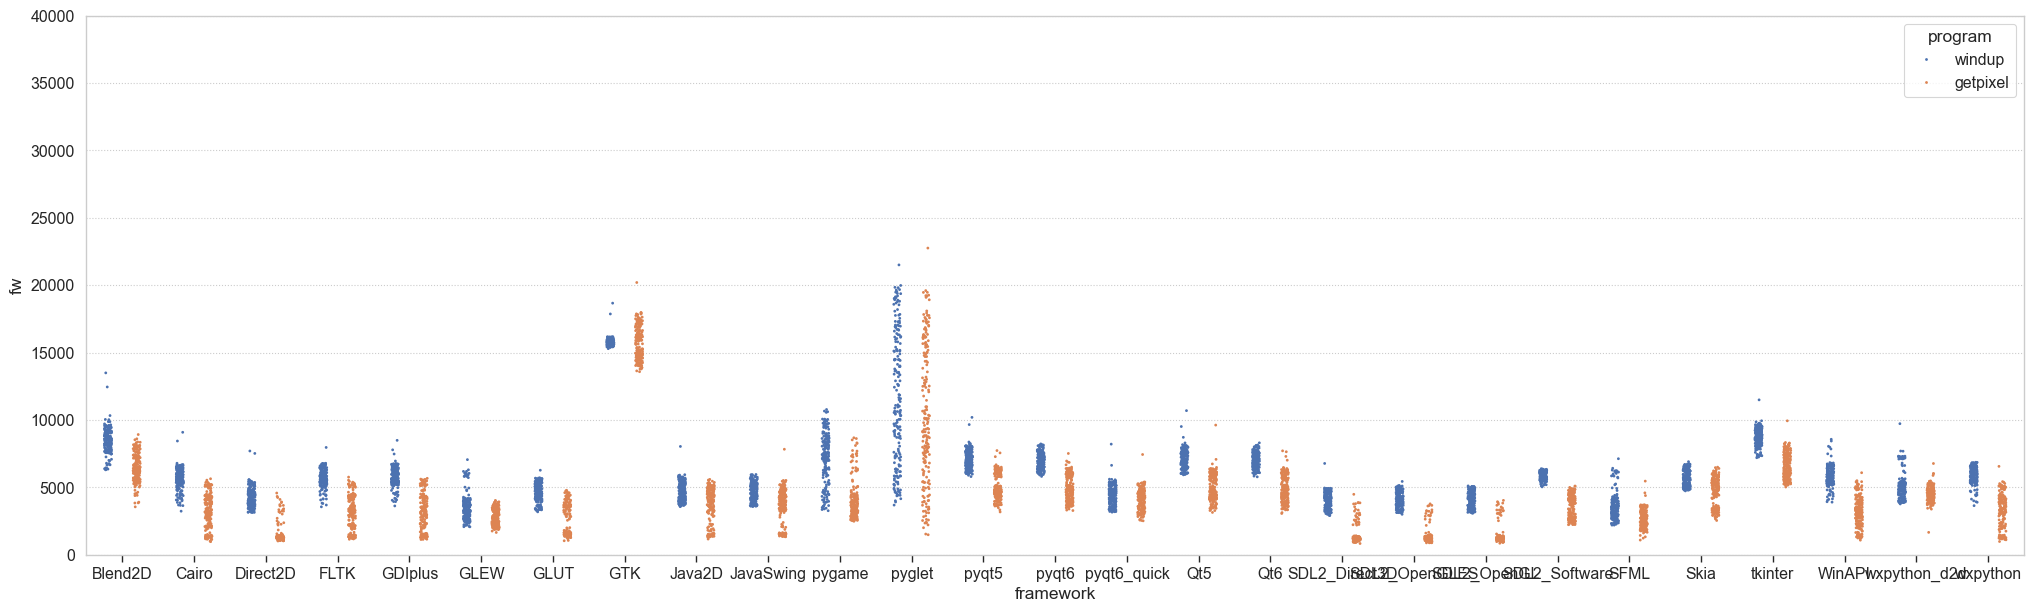

In [32]:
plot = sns.stripplot(data=data_default_large, x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel'], dodge=True, size=2)
plot.axes.set_ylim(0, 40000)

(0.0, 40000.0)

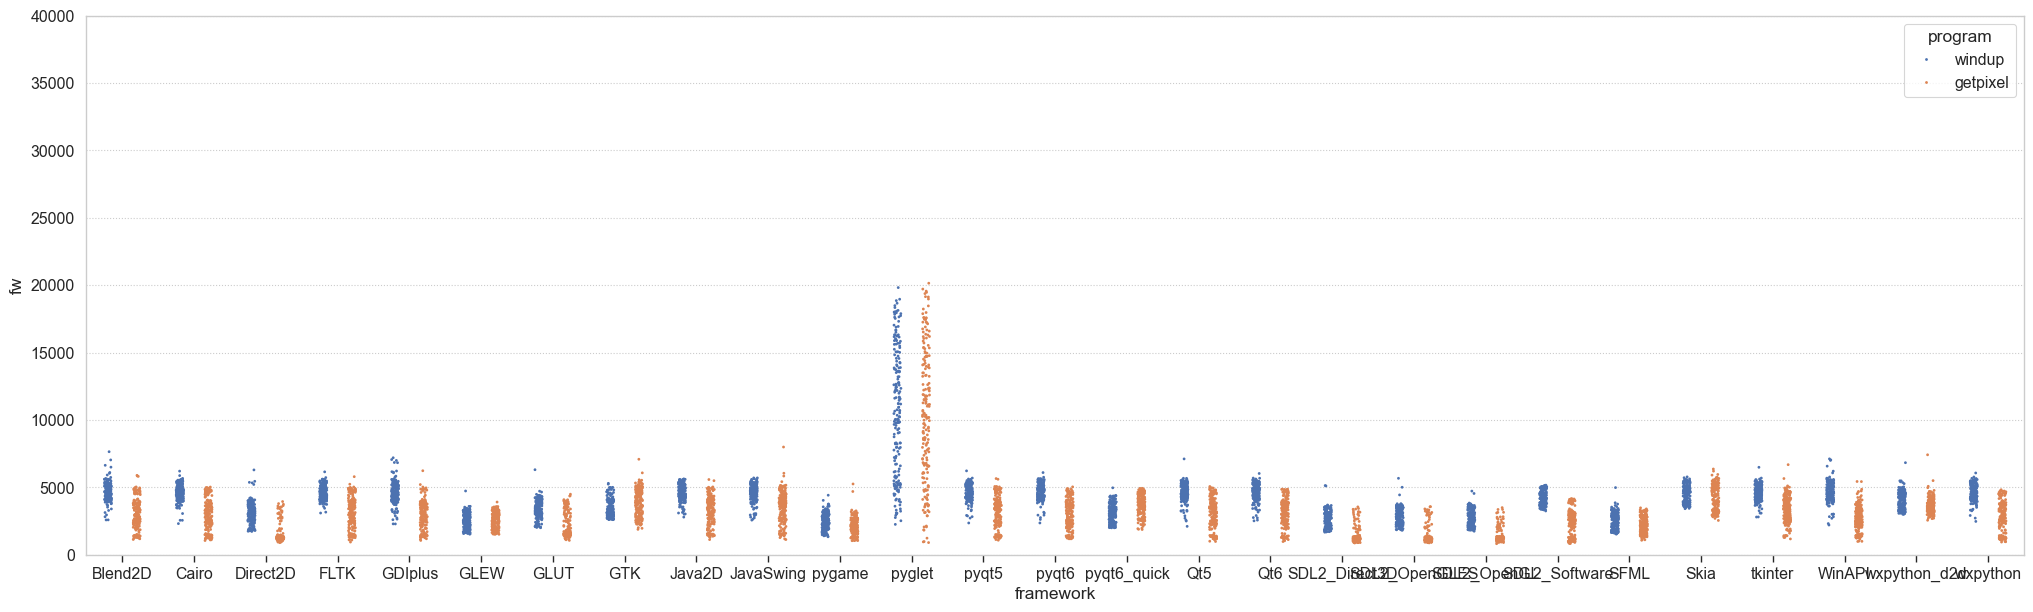

In [33]:
plot = sns.stripplot(data=data_default_small, x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel'], dodge=True, size=2)
plot.axes.set_ylim(0, 40000)

(0.0, 50000.0)

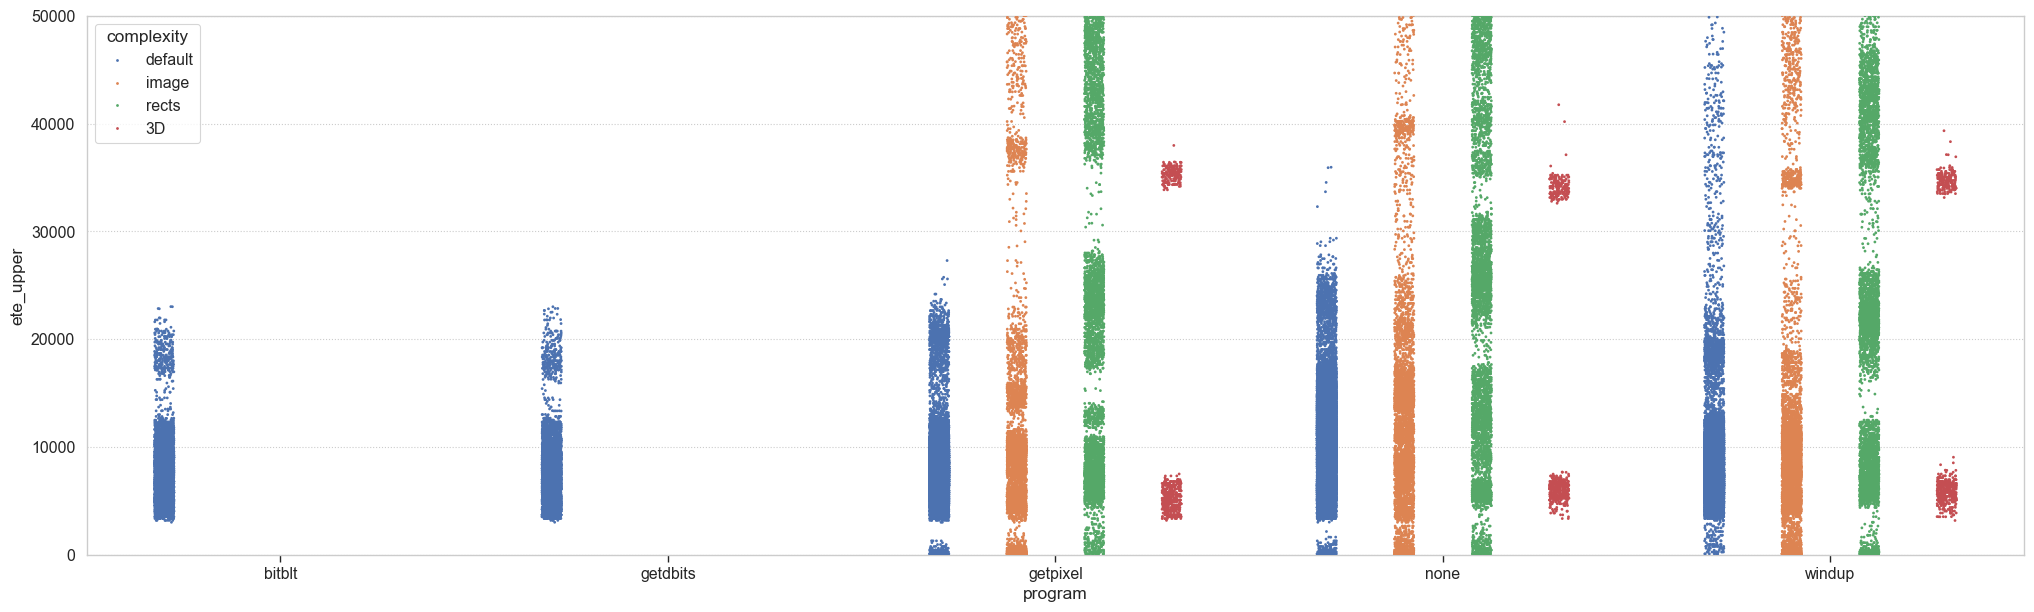

In [42]:
plot = sns.stripplot(data=data, x='program', y='ete_upper', hue='complexity', dodge=True, size=2)
plot.axes.set_ylim(0, 50000)

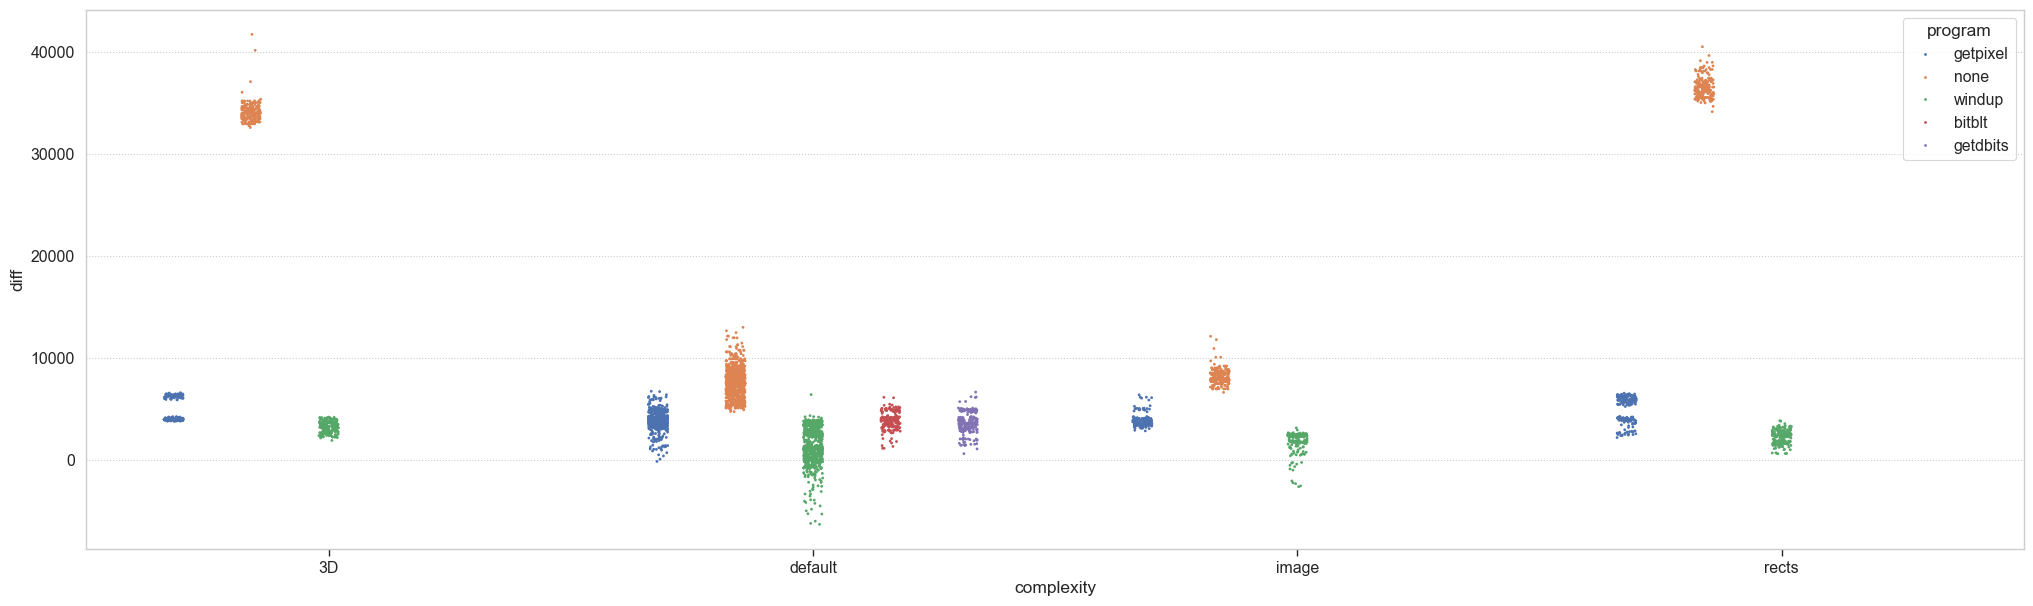

In [44]:
plot = sns.stripplot(data=data[data['framework'] == 'pygame'], x='complexity', y='diff', hue='program', dodge=True, size=2)
#plot.axes.set_ylim(-10000, 20000)

In [9]:
sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(10, 25), "xtick.bottom": True, "grid.linestyle": ":"})

In [15]:
data_image = data[data['complexity'] == 'image']
data_rects = data[data['complexity'] == 'rects']
data_3D = data[data['complexity'] == '3D']

(0.0, 25000.0)

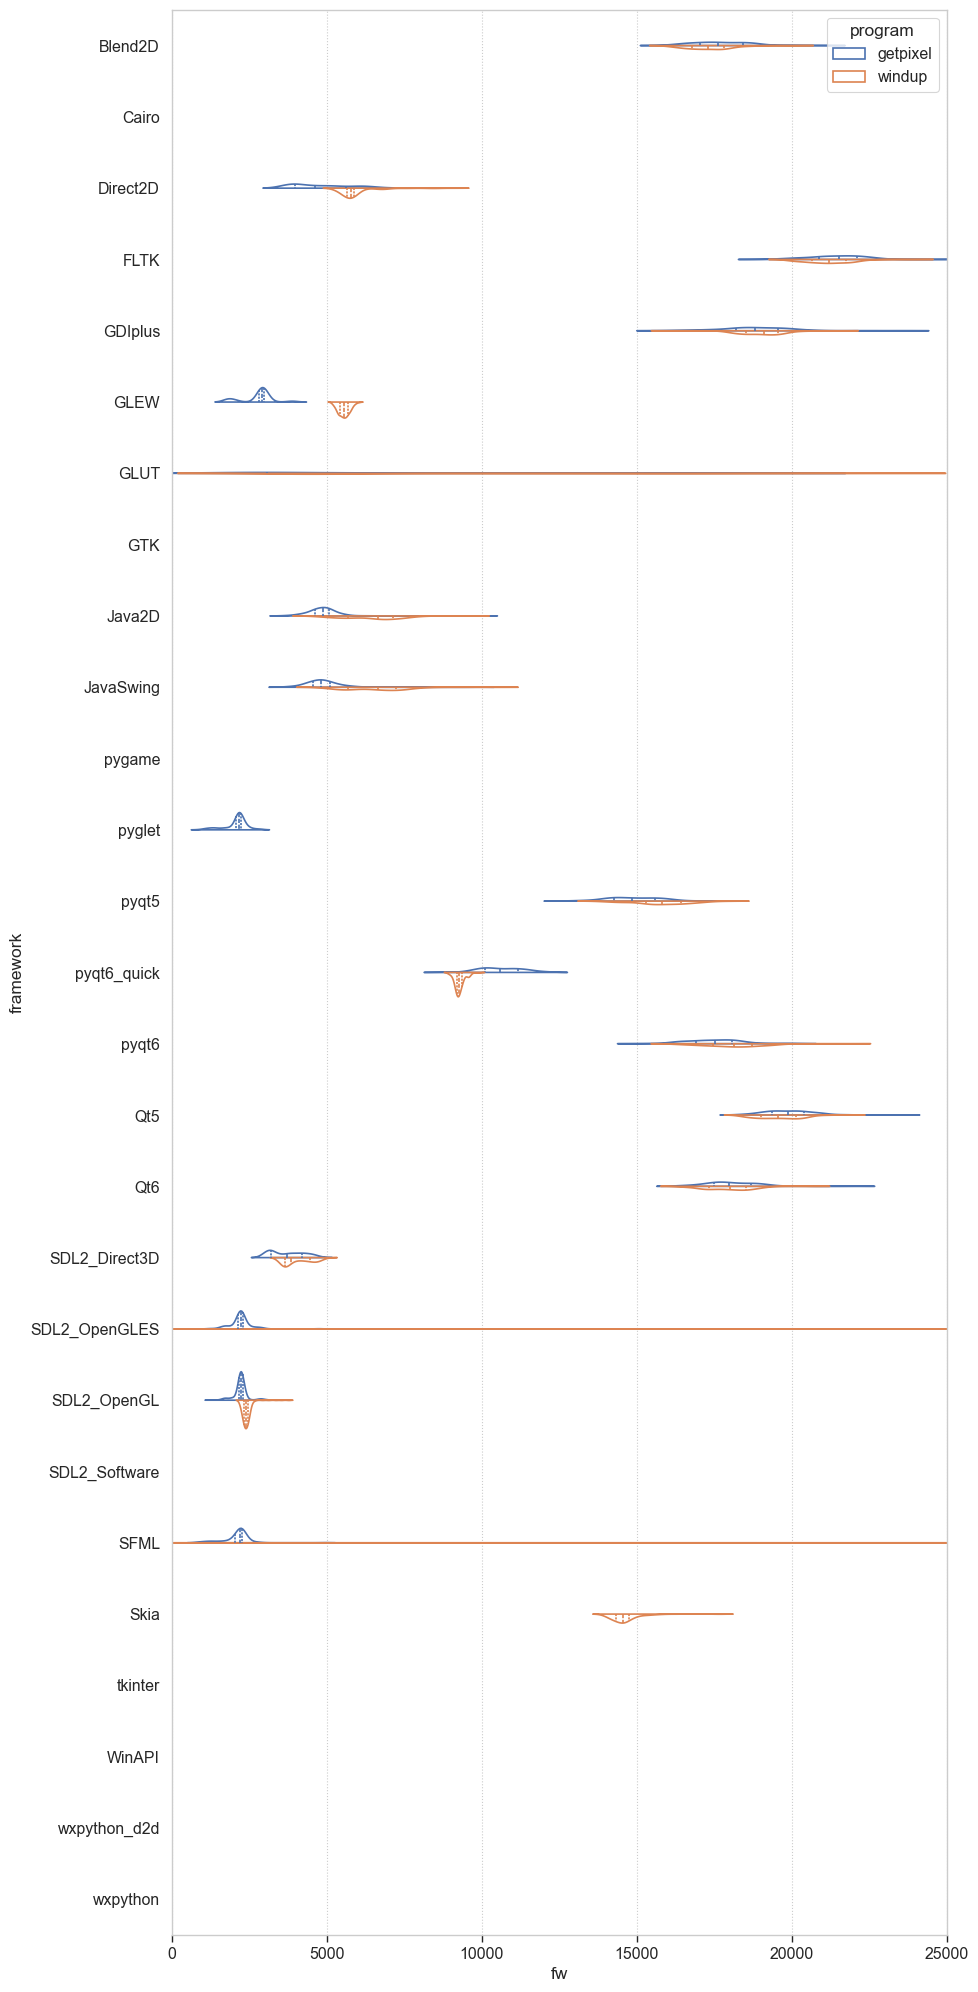

In [19]:
plto = sns.violinplot(data=data_rects[data_rects['program'] != 'none'], x='fw', y='framework', orient='y', hue='program', split=True, inner='quart', fill=False)
plto.axes.set_xlim(0, 25000)

(0.0, 75000.0)

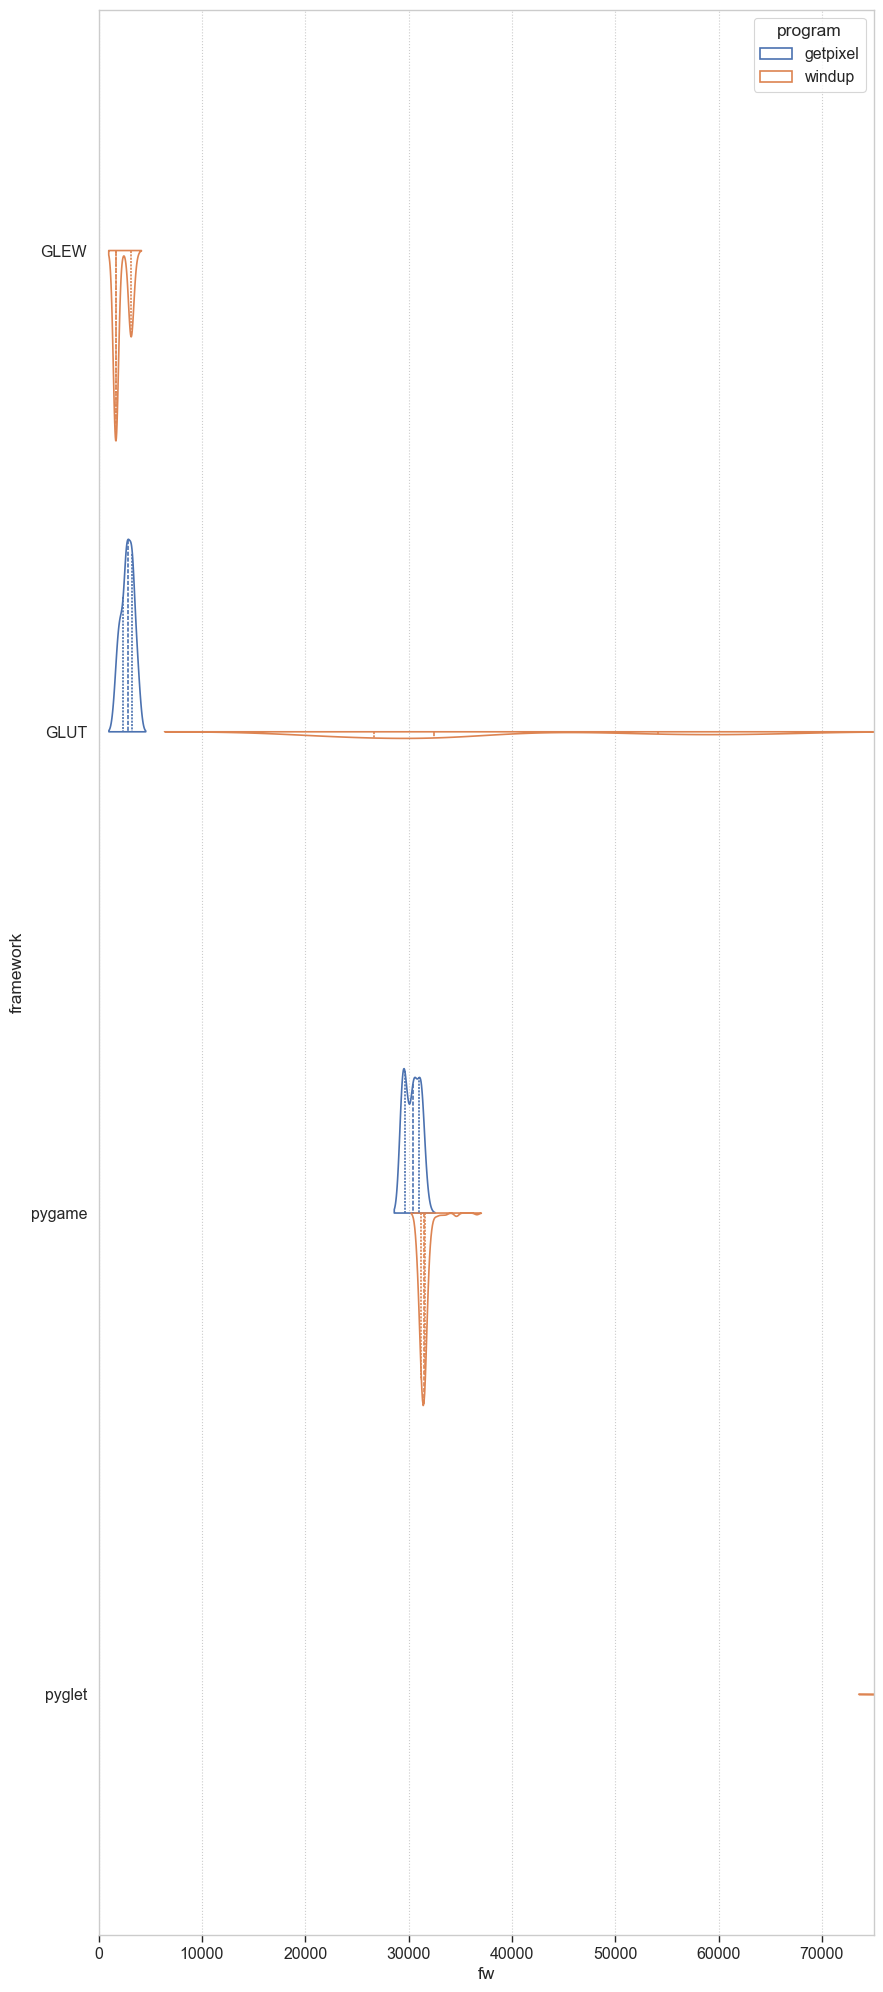

In [22]:
plto = sns.violinplot(data=data_3D[data_3D['program'] != 'none'], x='fw', y='framework', orient='y', hue='program', split=True, inner='quart', fill=False)
plto.axes.set_xlim(0, 75000)

(0.0, 25000.0)

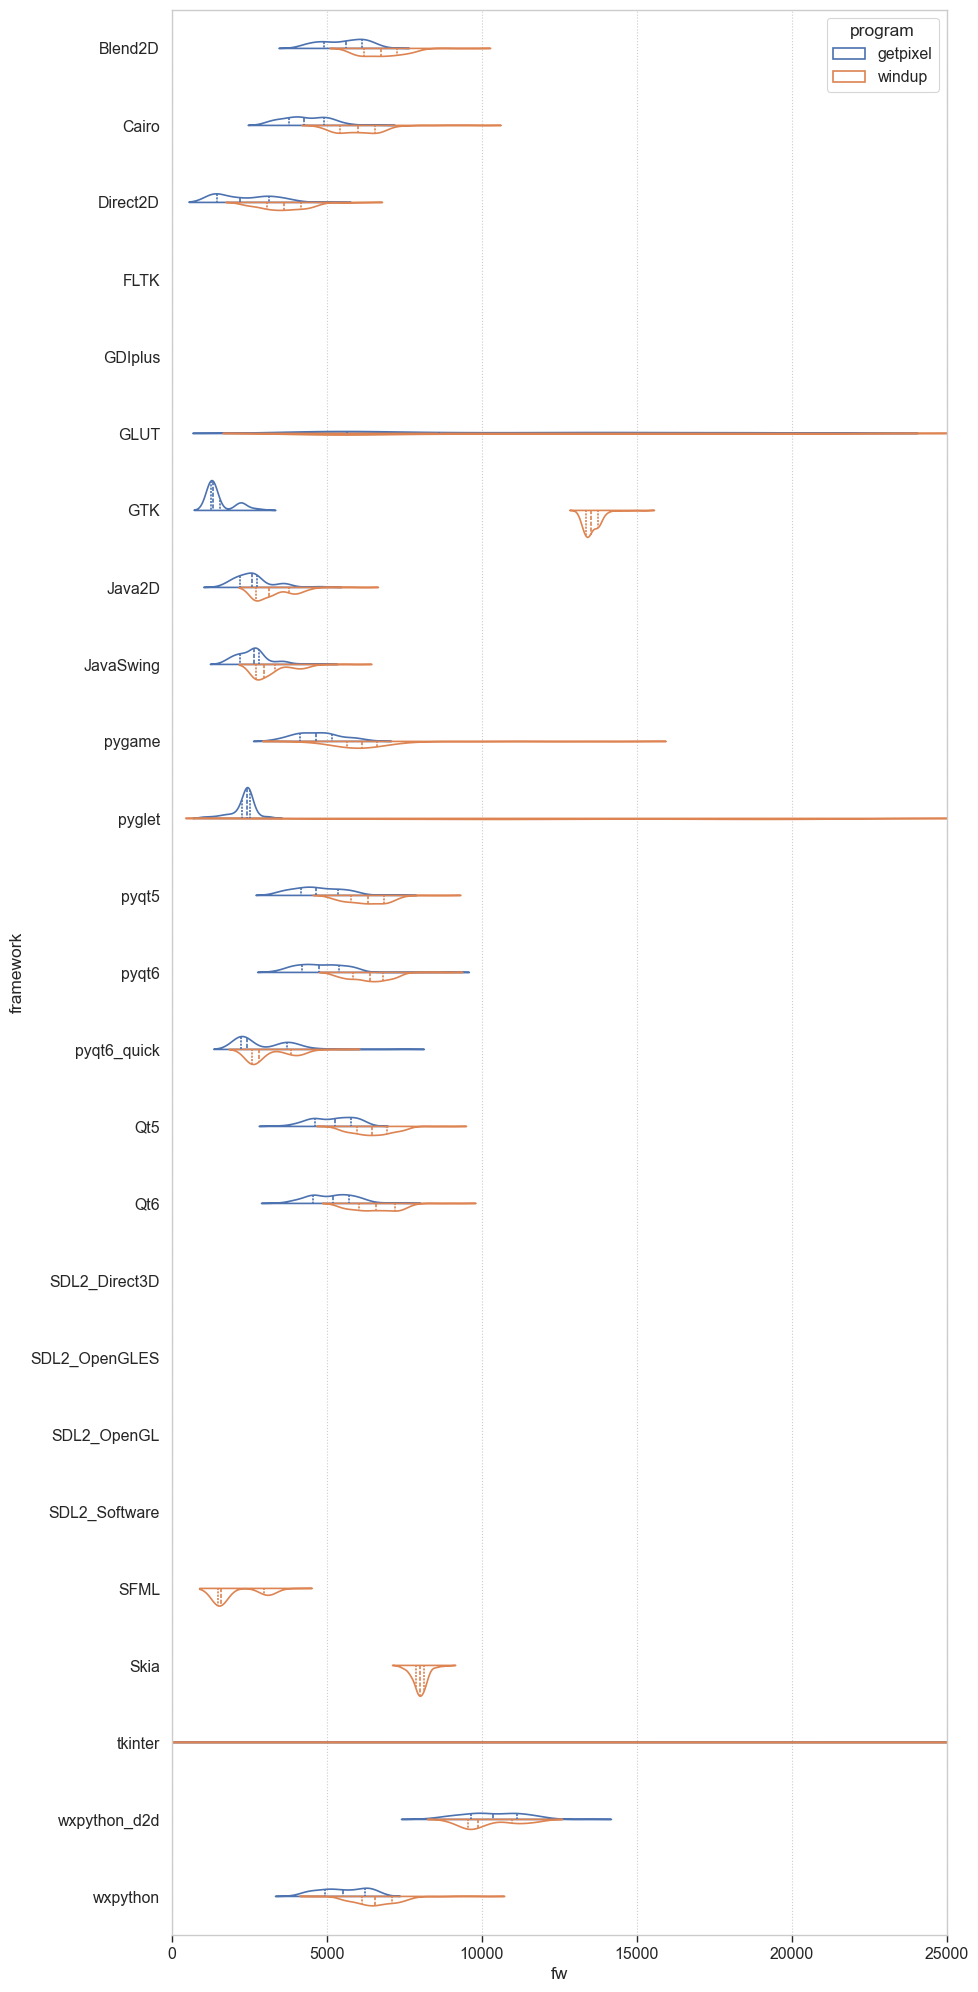

In [16]:
plto = sns.violinplot(data=data_image[data_image['program'] != 'none'], x='fw', y='framework', hue='program', split=True, inner='quart', fill=False)
plto.axes.set_xlim(0, 25000)

(0.0, 25000.0)

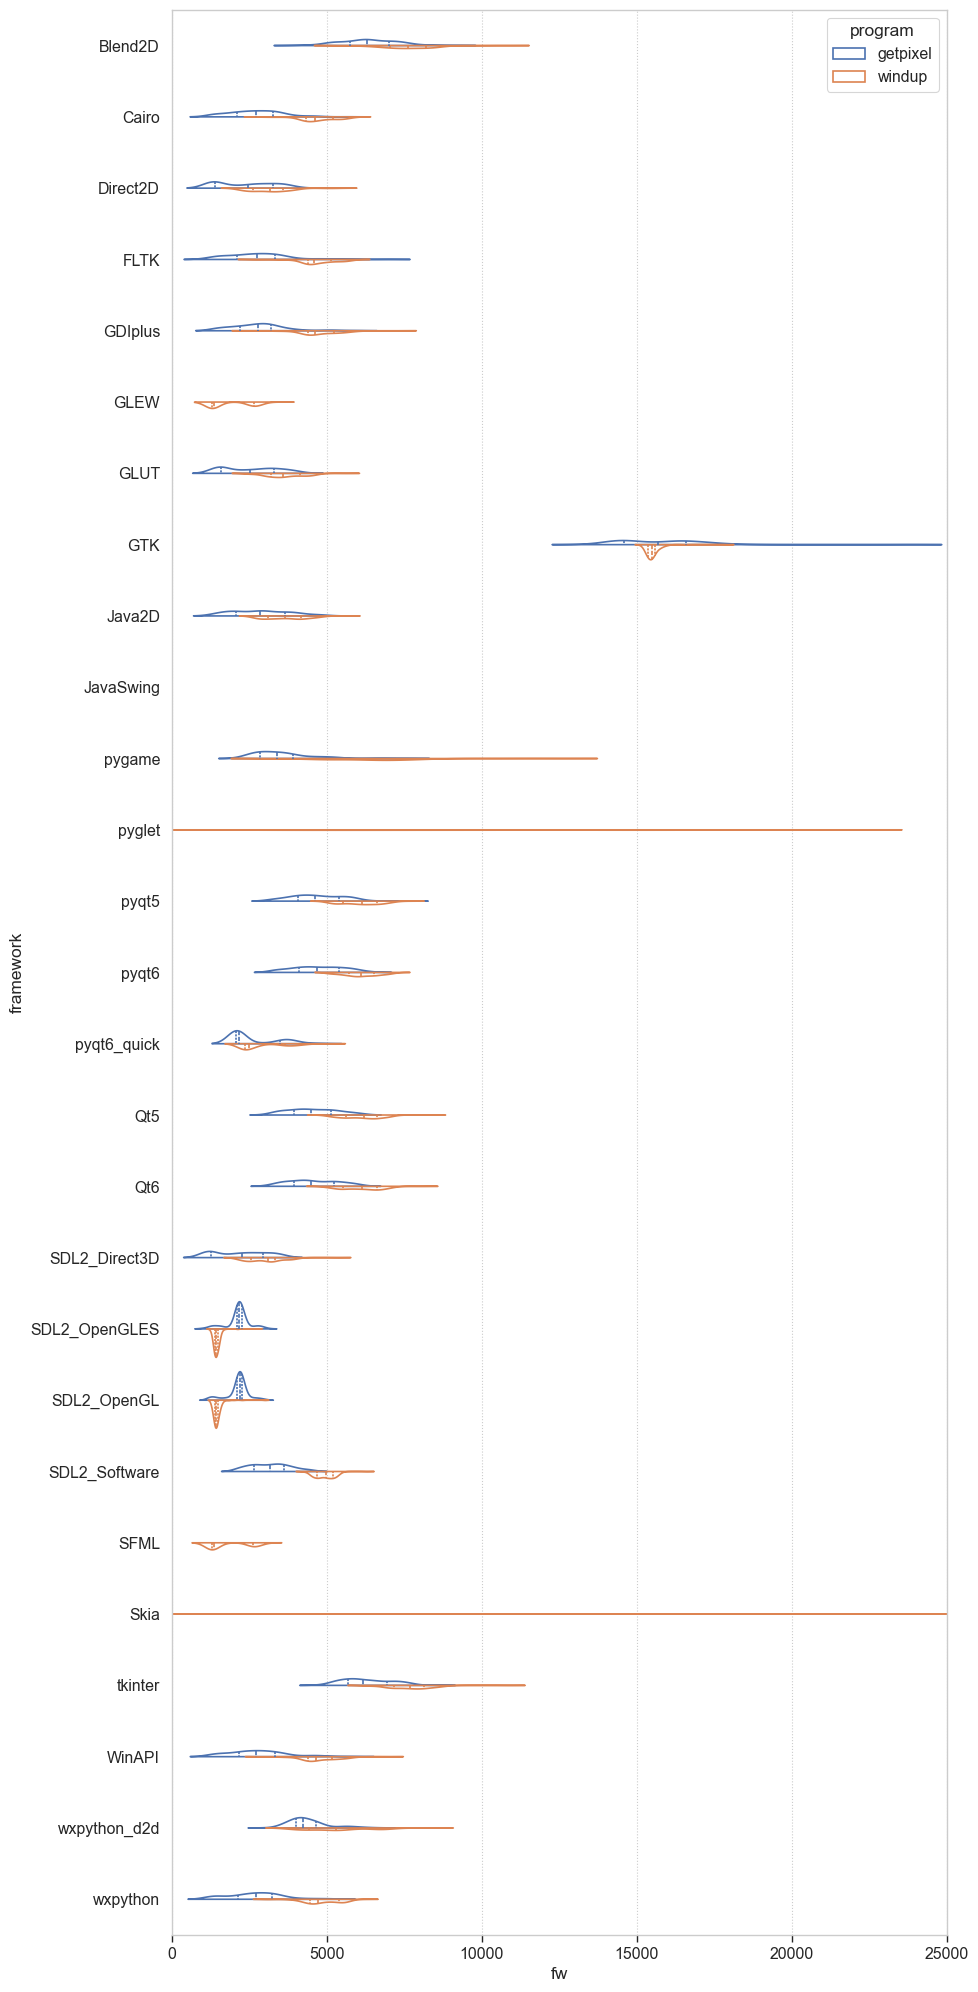

In [18]:
plto = sns.violinplot(data=data_default_nfs[data_default_nfs['program'] != 'none'], x='fw', y='framework', orient='y', hue='program', split=True, inner='quart', fill=False)
plto.axes.set_xlim(0, 25000)

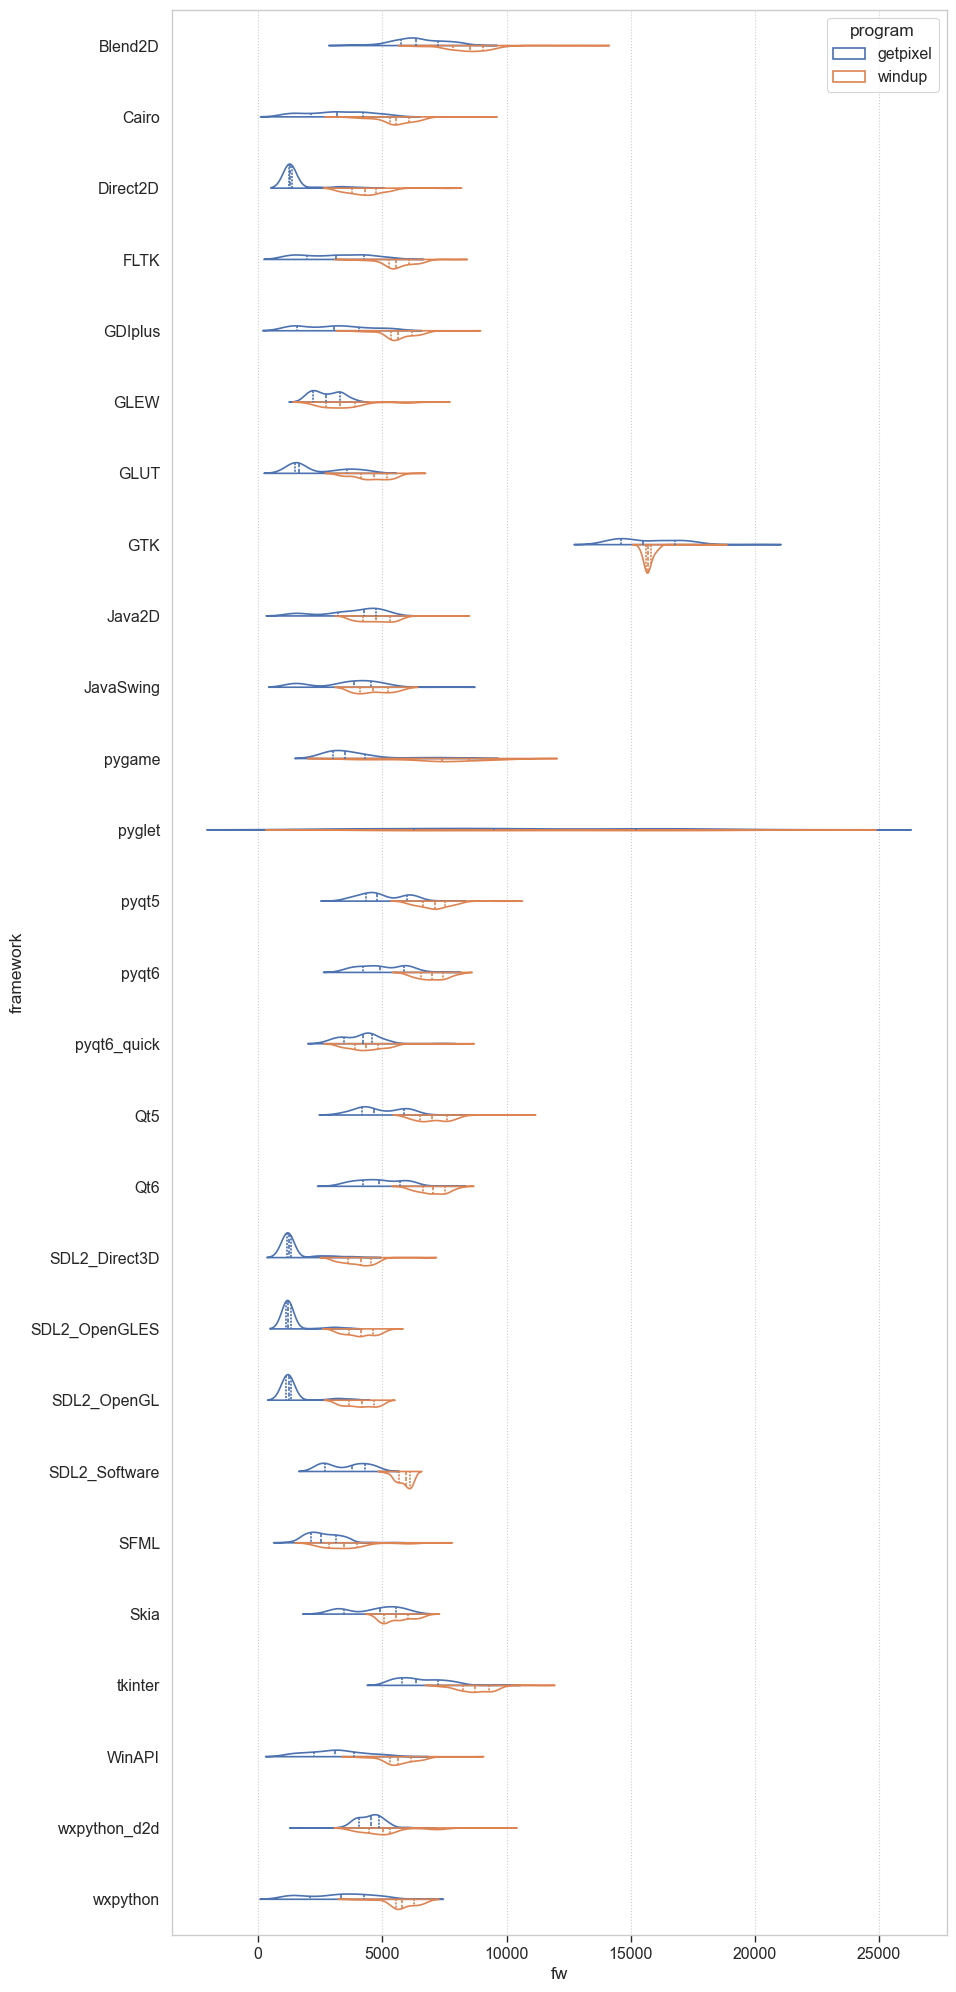

In [10]:
plto = sns.violinplot(data=data_default_large[data_default_large['program'] != 'none'], x='fw', y='framework', hue='program', split=True, inner='quart', fill=False)
# plot = sns.swarmplot(data=data_default_fs, x='fw', y='framework', hue='program', dodge=True, size=2)
# plot.axes.set_xlim(0, 50000)

(0.0, 30000.0)

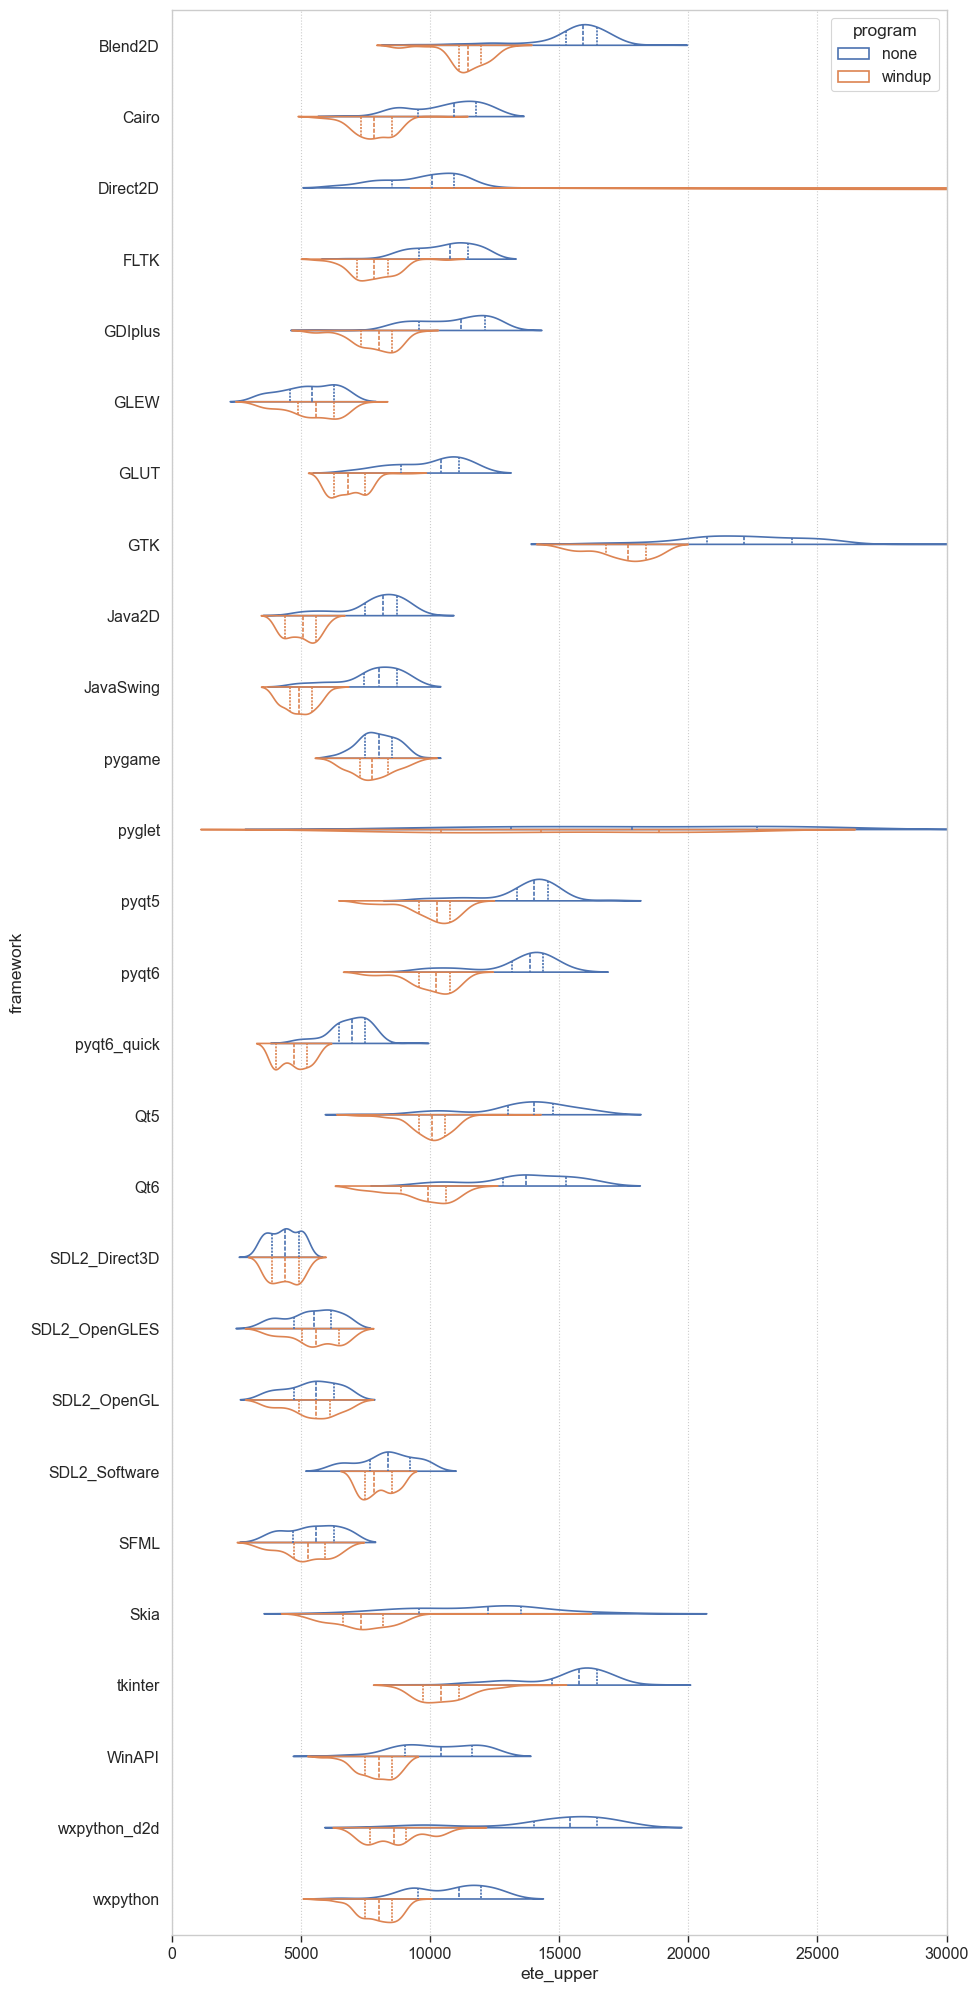

In [36]:
data_validate_windup = data_default_fs[(data_default_fs['program'] == 'windup') | (data_default_fs['program'] == 'none')]
plot = sns.violinplot(data=data_validate_windup, x='ete_upper', y='framework', hue='program', split=True, fill=False, inner='quart')
plot.axes.set_xlim(0, 30000)

(0.0, 30000.0)

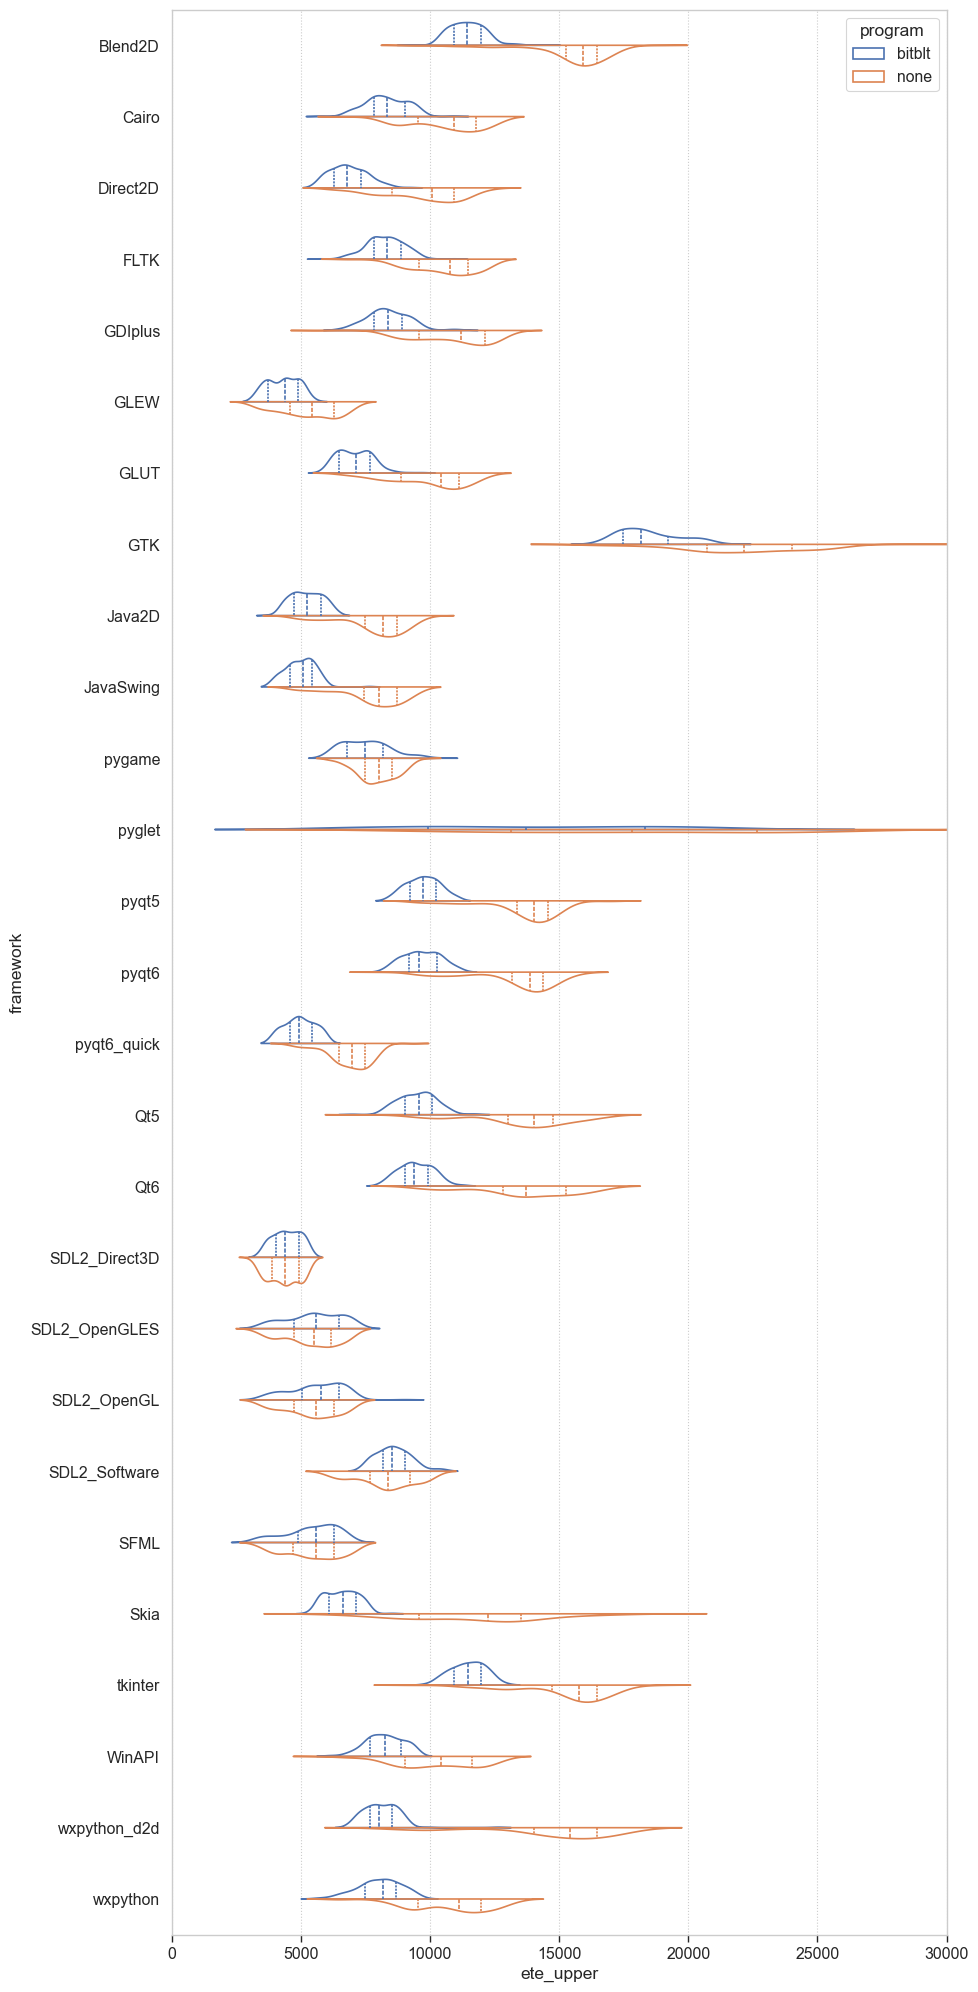

In [37]:
data_validate_bitblt = data_default_fs[(data_default_fs['program'] == 'bitblt') | (data_default_fs['program'] == 'none')]
plot = sns.violinplot(data=data_validate_bitblt, x='ete_upper', y='framework', hue='program', split=True, fill=False, inner='quart')
plot.axes.set_xlim(0, 30000)

(0.0, 30000.0)

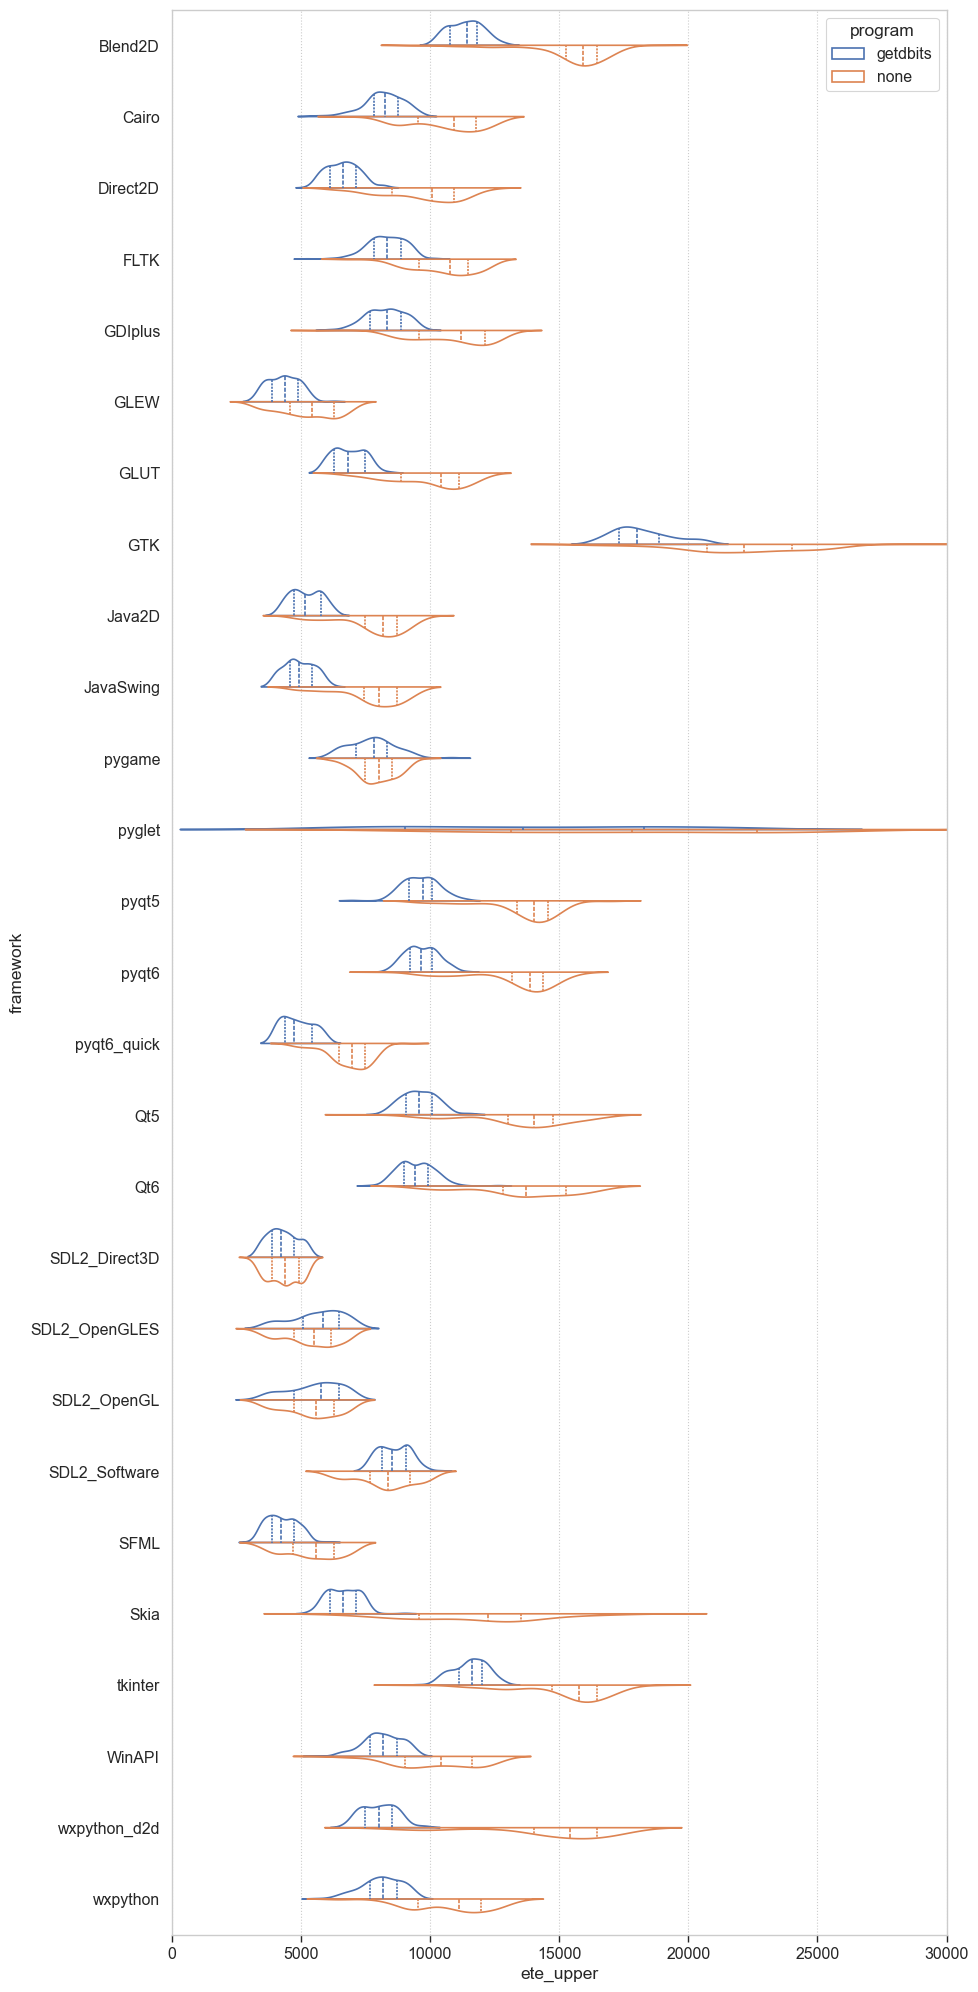

In [38]:
data_validate_getdbits = data_default_fs[(data_default_fs['program'] == 'getdbits') | (data_default_fs['program'] == 'none')]
plot = sns.violinplot(data=data_validate_getdbits, x='ete_upper', y='framework', hue='program', split=True, fill=False, inner='quart')
plot.axes.set_xlim(0, 30000)

(0.0, 30000.0)

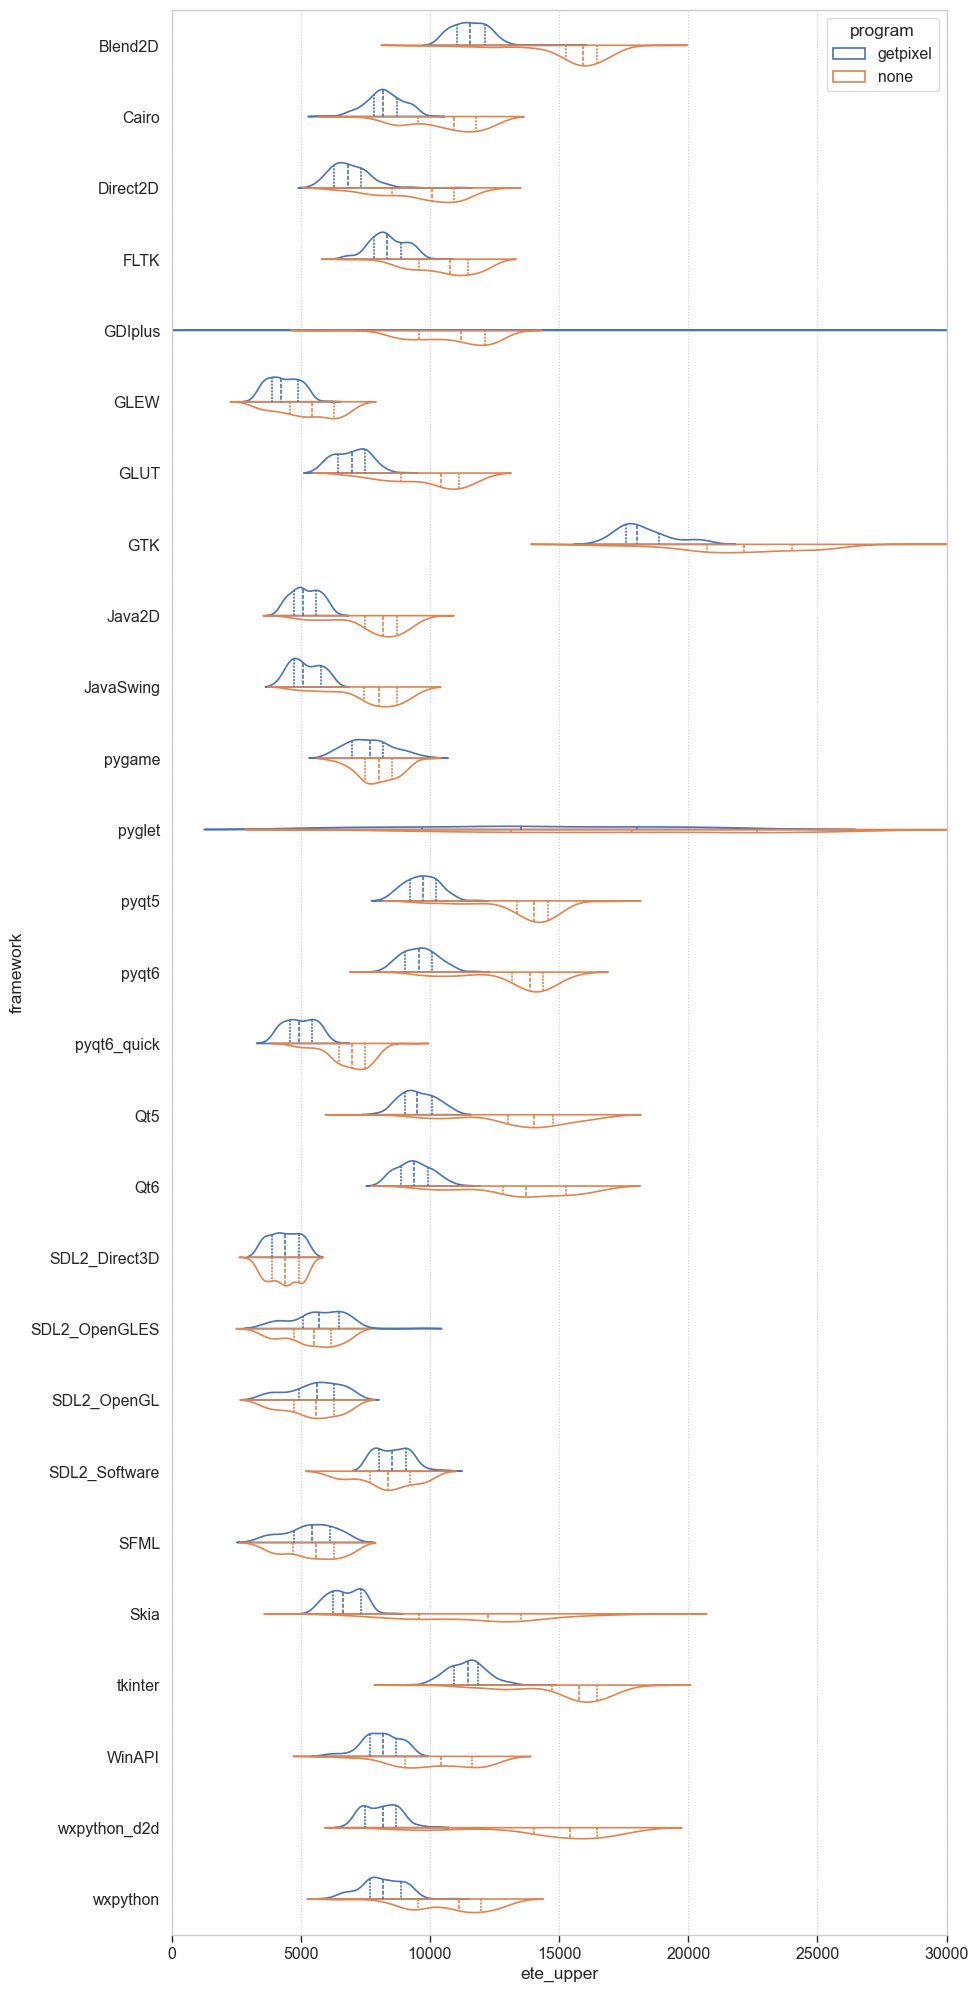

In [35]:
data_validate_getpixel = data_default_fs[(data_default_fs['program'] == 'getpixel') | (data_default_fs['program'] == 'none')]
plot = sns.violinplot(data=data_validate_getpixel, x='ete_upper', y='framework', hue='program', split=True, fill=False, inner='quart')
plot.axes.set_xlim(0, 30000)

(0.0, 30000.0)

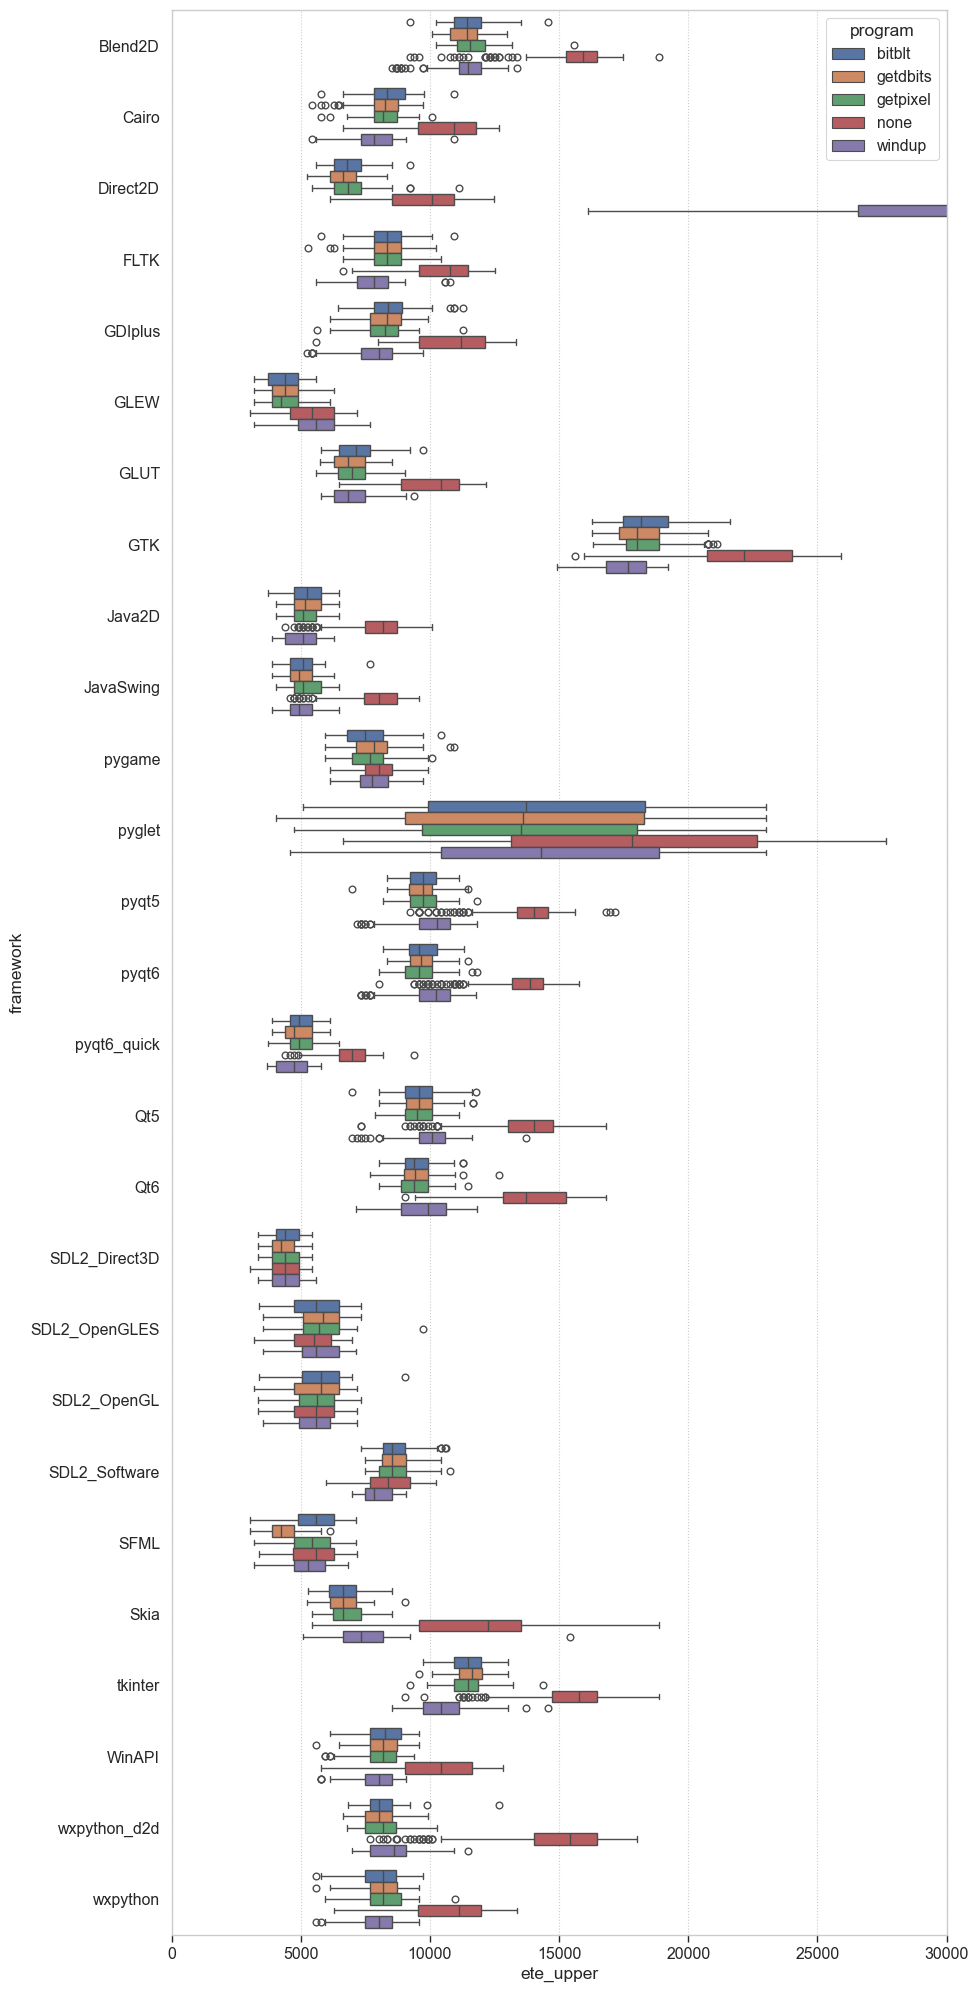

In [42]:
plot = sns.boxplot(data=data_default_fs, x='ete_upper', y='framework', hue='program')
plot.axes.set_xlim(0, 30000)

In [50]:
frameworks = data_default_fs['framework'].unique()
programs = data_default_fs['program'].unique()
mean_dict = {}
for framework in frameworks:
    program_dict = {}
    for program in programs:
        data_temp = data_default_fs[(data_default_fs['program'] == program) & (data_default_fs['framework'] == framework)]
        program_dict[program] = data_temp['ete_upper'].median()
    mean_dict[framework] = program_dict

mean_dict

{'Blend2D': {'bitblt': 11453.5,
  'getdbits': 11451.0,
  'getpixel': 11547.0,
  'none': 15934.0,
  'windup': 11459.5},
 'Cairo': {'bitblt': 8356.5,
  'getdbits': 8273.5,
  'getpixel': 8189.5,
  'none': 10944.0,
  'windup': 7842.0},
 'Direct2D': {'bitblt': 6808.5,
  'getdbits': 6637.5,
  'getpixel': 6811.5,
  'none': 10079.0,
  'windup': 34793.5},
 'FLTK': {'bitblt': 8353.5,
  'getdbits': 8356.5,
  'getpixel': 8351.5,
  'none': 10769.5,
  'windup': 7840.0},
 'GDIplus': {'bitblt': 8359.0,
  'getdbits': 8358.0,
  'getpixel': 8274.0,
  'none': 11204.0,
  'windup': 8016.5},
 'GLEW': {'bitblt': 4395.5,
  'getdbits': 4395.0,
  'getpixel': 4235.0,
  'none': 5431.0,
  'windup': 5604.0},
 'GLUT': {'bitblt': 7149.0,
  'getdbits': 6815.5,
  'getpixel': 6984.5,
  'none': 10420.0,
  'windup': 6810.5},
 'GTK': {'bitblt': 18189.5,
  'getdbits': 18005.5,
  'getpixel': 18008.0,
  'none': 22157.0,
  'windup': 17670.0},
 'Java2D': {'bitblt': 5260.5,
  'getdbits': 5176.5,
  'getpixel': 5100.5,
  'none': 81

In [51]:
median_data = pd.DataFrame(data=mean_dict)
median_data

,Blend2D,Cairo,Direct2D,FLTK,GDIplus,GLEW,GLUT,GTK,Java2D,JavaSwing,...,SDL2_Direct3D,SDL2_OpenGLES,SDL2_OpenGL,SDL2_Software,SFML,Skia,tkinter,WinAPI,wxpython_d2d,wxpython
bitblt,11453.5,8356.5,6808.5,8353.5,8359.0,4395.5,7149.0,18189.5,5260.5,5083.5,...,4405.0,5605.0,5774.0,8537.5,5604.0,6638.0,11468.5,8272.5,8023.0,8181.0
getdbits,11451.0,8273.5,6637.5,8356.5,8358.0,4395.0,6815.5,18005.5,5176.5,4917.0,...,4227.0,5866.0,5779.5,8549.0,4228.0,6641.0,11632.0,8185.5,8020.0,8186.0
getpixel,11547.0,8189.5,6811.5,8351.5,8274.0,4235.0,6984.5,18008.0,5100.5,5090.5,...,4397.0,5697.0,5618.0,8536.5,5436.5,6647.0,11463.5,8189.0,8182.5,8187.5
none,15934.0,10944.0,10079.0,10769.5,11204.0,5431.0,10420.0,22157.0,8183.5,8020.0,...,4398.5,5521.5,5601.5,8365.5,5595.5,12236.5,15774.5,10417.0,15418.0,11135.5
windup,11459.5,7842.0,34793.5,7840.0,8016.5,5604.0,6810.5,17670.0,5088.0,4921.5,...,4402.0,5604.0,5603.5,7852.0,5261.5,7334.5,10433.0,8016.0,8617.5,8019.5


In [54]:
median_data = median_data.T

In [56]:
median_data['getpixel_diff'] = median_data['getpixel'] - median_data['none']
median_data['getdbits_diff'] = median_data['getdbits'] - median_data['none']
median_data['bitblt_diff'] = median_data['bitblt'] - median_data['none']
median_data['windup_diff'] = median_data['windup'] - median_data['none']
median_data

,bitblt,getdbits,getpixel,none,windup,getpixel_diff,getdbits_diff,bitblt_diff,windup_diff
Blend2D,11453.5,11451.0,11547.0,15934.0,11459.5,-4387.0,-4483.0,-4480.5,-4474.5
Cairo,8356.5,8273.5,8189.5,10944.0,7842.0,-2754.5,-2670.5,-2587.5,-3102.0
Direct2D,6808.5,6637.5,6811.5,10079.0,34793.5,-3267.5,-3441.5,-3270.5,24714.5
FLTK,8353.5,8356.5,8351.5,10769.5,7840.0,-2418.0,-2413.0,-2416.0,-2929.5
GDIplus,8359.0,8358.0,8274.0,11204.0,8016.5,-2930.0,-2846.0,-2845.0,-3187.5
GLEW,4395.5,4395.0,4235.0,5431.0,5604.0,-1196.0,-1036.0,-1035.5,173.0
GLUT,7149.0,6815.5,6984.5,10420.0,6810.5,-3435.5,-3604.5,-3271.0,-3609.5
GTK,18189.5,18005.5,18008.0,22157.0,17670.0,-4149.0,-4151.5,-3967.5,-4487.0
Java2D,5260.5,5176.5,5100.5,8183.5,5088.0,-3083.0,-3007.0,-2923.0,-3095.5
JavaSwing,5083.5,4917.0,5090.5,8020.0,4921.5,-2929.5,-3103.0,-2936.5,-3098.5


(0.0, 15000.0)

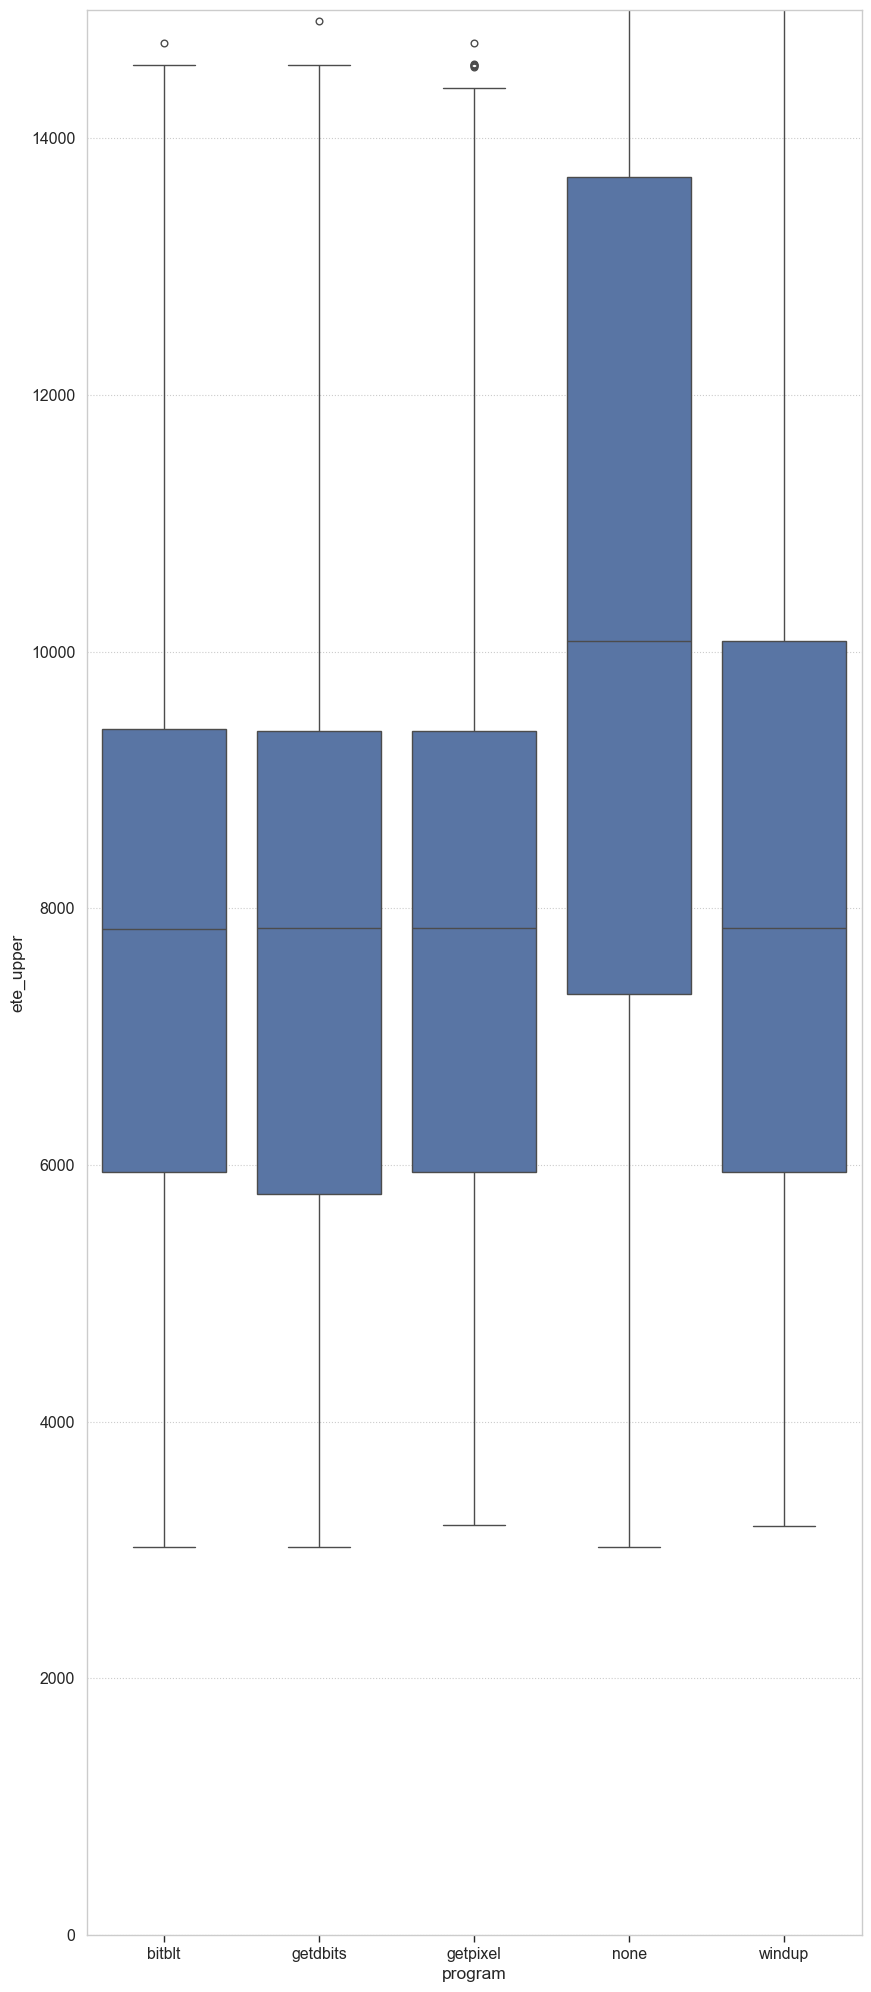

In [49]:
plot = sns.boxplot(data=data_default_fs, x='program', y='ete_upper')
plot.axes.set_ylim(0, 15000)